In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import os
os.getcwd()

'C:\\Users\\jooye\\OneDrive - dongguk.edu\\비어플\\2203 신용카드 연체 예측 프로젝트'

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

### 데이터 확인

In [4]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
test.head()
# credit이 타겟변수

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [6]:
train = train.drop('index', axis=1)
test = test.drop('index', axis = 1)

In [7]:
train.shape

(26457, 19)

In [8]:
test.shape

(10000, 18)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  occyp_type     18286 non-null  object 
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

- index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
	['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

- edu_type: 교육 수준
	['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부
	['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식
	['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일
	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화(가정용) 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
	데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
=> 낮을 수록 높은 신용의 신용카드 사용자 의미함

	

#### 결측치 확인

In [10]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

#### 이상치 확인

In [11]:
train.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [12]:
# flag_mobil 모두 1 => drop
train = train.drop('FLAG_MOBIL', axis=1)
test = test.drop('FLAG_MOBIL', axis = 1)

In [13]:
train[train['family_size']>=10]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-7.0,2.0
9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-58.0,2.0
10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-43.0,2.0


In [14]:
train[train['child_num']>10]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
8462,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-7.0,2.0
9021,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-58.0,2.0
10731,F,N,Y,19,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11057,-1853,1,1,0,Waiters/barmen staff,20.0,-5.0,2.0
25390,M,Y,Y,14,225000.0,Working,Secondary / secondary special,Separated,House / apartment,-17754,-1689,0,0,0,Drivers,15.0,-43.0,2.0


In [15]:
i =  train[train['family_size']>=10].index
train=train.drop(i, axis=0)

-> 이상치 drop

In [16]:
train[(train['child_num'] - train['family_size']) > 0]
# 가족 수 < 아이 수 => drop 

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
14900,M,Y,N,2,225000.0,Working,Secondary / secondary special,Married,House / apartment,-14776,-2212,0,0,0,Drivers,1.0,-30.0,2.0


In [17]:
i2 = train[(train['child_num'] - train['family_size']) > 0].index
train = train.drop(i2)

In [18]:
train.shape

(26452, 18)

#### 데이터 분포
- 타겟변수

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credit', ylabel='count'>

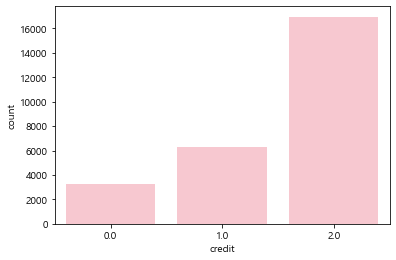

In [19]:
plt.rc('font',family='Malgun Gothic')
sns.countplot(train['credit'],color='pink')

In [20]:
train['credit'].value_counts()

2.0    16963
1.0     6267
0.0     3222
Name: credit, dtype: int64

- 범주형

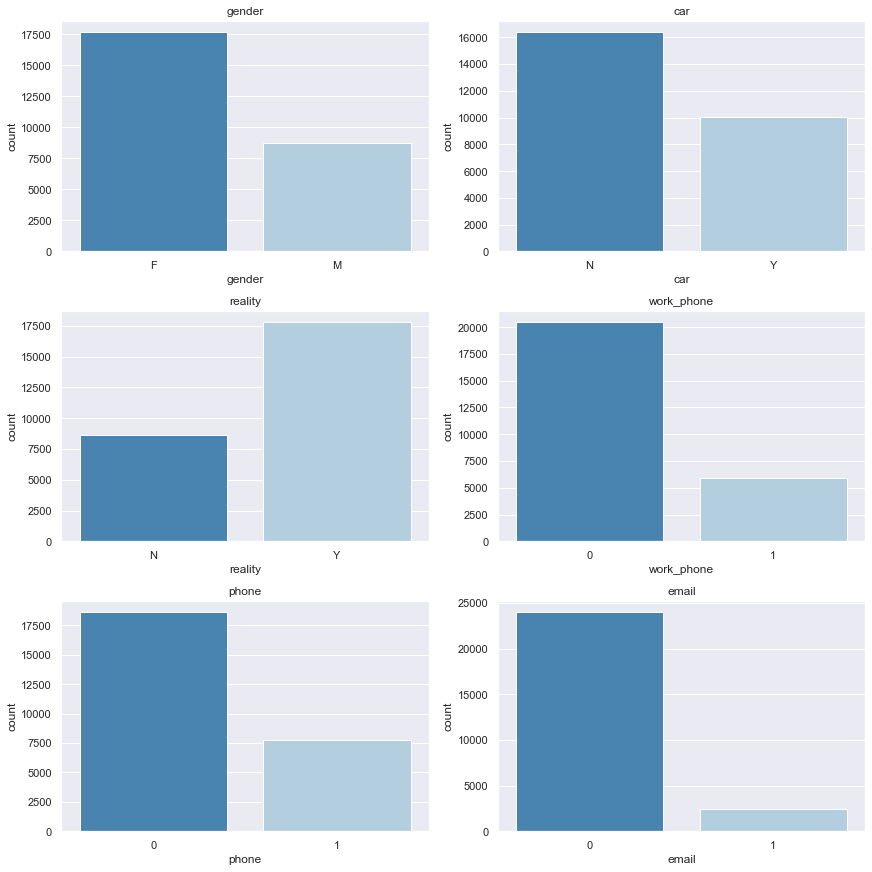

In [21]:
df_ct=['gender','car','reality','work_phone','phone','email']

sns.set(font_scale = 1)
f,ax=plt.subplots(3,2,figsize=(12,12),constrained_layout=True)
j=[0,0,1,1,2,2]    # 그래프행설정
k=[0,1,0,1,0,1]    # 그래프열설정
for i,j,k in zip(df_ct,j,k):
    sns.countplot(x=i,data=train,ax=ax[j,k],palette='Blues_r')
    ax[j,k].title.set_text(i)
    plt.rc('font',family='Malgun Gothic')
    plt.rc('axes',unicode_minus=False)

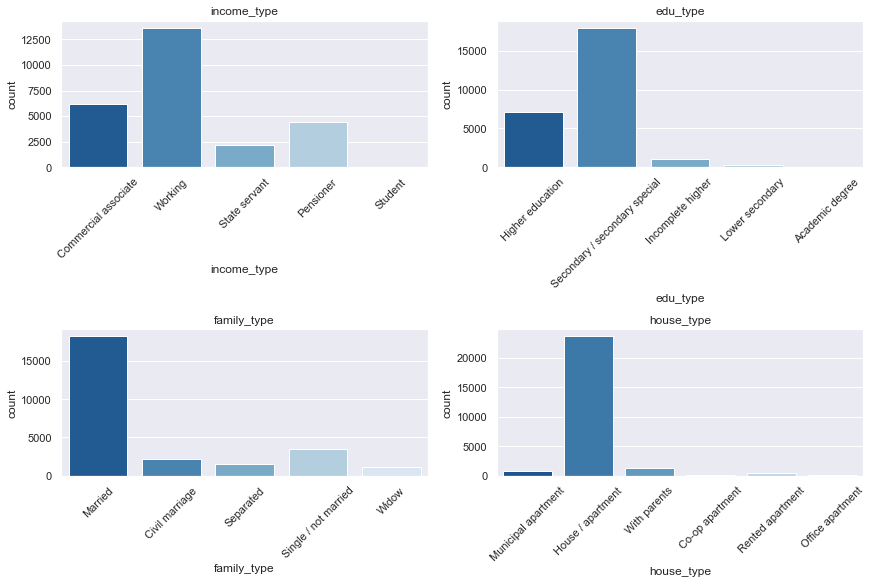

In [22]:
df_ct=['income_type','edu_type','family_type','house_type']

sns.set(font_scale = 1)
f,ax=plt.subplots(2,2,figsize=(12,8),constrained_layout=True)
j=[0,0,1,1]    # 그래프행설정
k=[0,1,0,1]    # 그래프열설정
for i,j,k in zip(df_ct,j,k):
    sns.countplot(x=i,data=train,ax=ax[j,k],palette='Blues_r')
    ax[j,k].title.set_text(i)
    plt.rc('font',family='Malgun Gothic')
    plt.rc('axes',unicode_minus=False)
    ax[j,k].set_xticklabels(train[i].unique(),rotation=45)

<AxesSubplot:>

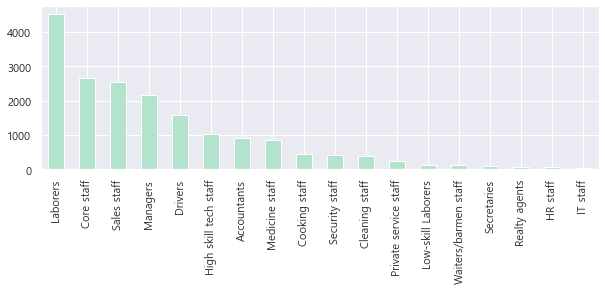

In [23]:
plt.rc('font',family='Malgun Gothic')
train['occyp_type'].value_counts().plot(kind='bar',colormap='Pastel2',figsize=(10,3))

- 연속형 변수

=> days birth, days employed, begin_month 양수로 변환

In [24]:
# days employed 양수 -> 0으로 변환 & 음수값 -> 양수값으로 변환
train['DAYS_EMPLOYED'] = [0 if d > 0 else abs(d) for d in train['DAYS_EMPLOYED']]

In [25]:
#음수값->양수값으로 변환
train['DAYS_BIRTH'] = [abs(d) for d in train['DAYS_BIRTH']]
train['begin_month'] = [abs(d) for d in train['begin_month']]

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

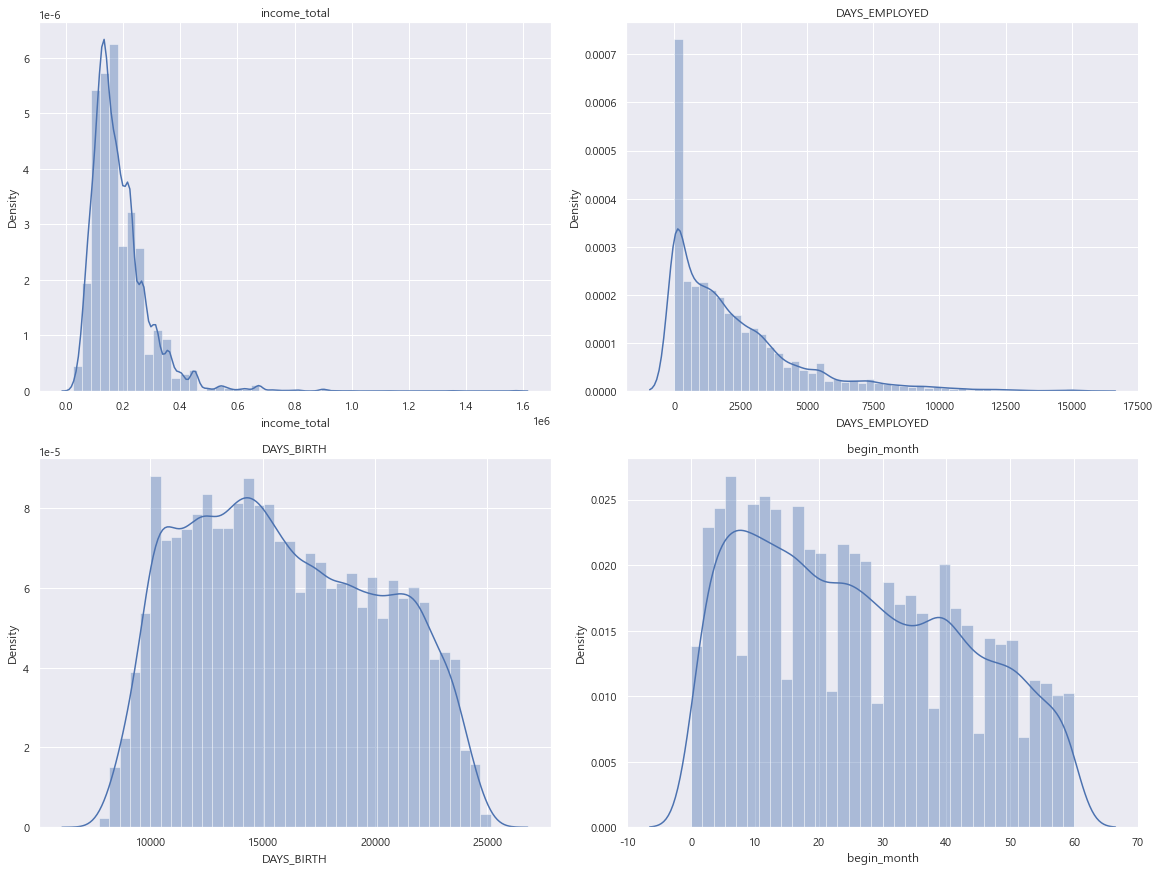

In [26]:
t_num=['income_total','DAYS_EMPLOYED', 'DAYS_BIRTH', 'begin_month']
f,ax=plt.subplots(2,2,figsize=(16,12),constrained_layout=True)
j=[0,0,1,1]
k=[0,1,0,1]
for i,j,k in zip(t_num,j,k):
    sns.distplot(train[i],ax=ax[j,k])
    ax[j,k].title.set_text(i)
    plt.rc('font', family = 'Malgun Gothic')
    plt.rc('axes', unicode_minus = False)

=> income total 로그변환 필요

In [27]:
train['DAYS_EMPLOYED'].value_counts()

0        4438
401        57
1539       47
200        45
2087       44
         ... 
8171        1
2995        1
2024        1
12253       1
2412        1
Name: DAYS_EMPLOYED, Length: 3469, dtype: int64

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


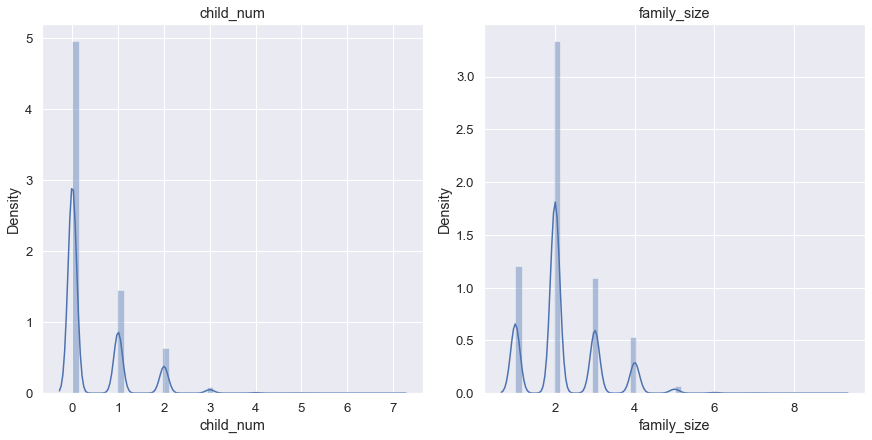

In [34]:
train_num = ['child_num','family_size']
f, ax = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)
k = [0, 1]

sns.set(font_scale = 1.2)
for i, k in zip(train_num, k):
    sns.distplot(train[i], ax = ax[k])
    ax[k].title.set_text(i)
    plt.rc('font', family = 'Malgun Gothic')
    plt.rc('axes', unicode_minus = False)

In [35]:
# experience 변수 생성
x = abs(train['DAYS_EMPLOYED']/365)
train['experience'] = round(x)
train['experience']

0        13.0
1         4.0
2        12.0
3         6.0
4         6.0
         ... 
26452     5.0
26453     7.0
26454     6.0
26455     0.0
26456     3.0
Name: experience, Length: 26452, dtype: float64

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='experience', ylabel='Density'>

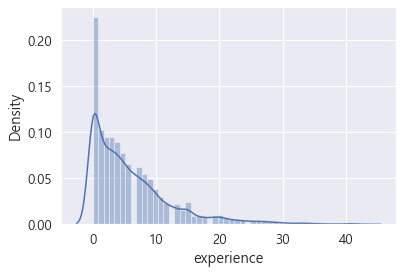

In [36]:
sns.distplot(train['experience'])

In [37]:
# age 변수 생성
train['age'] = round(train['DAYS_BIRTH']/365)

C:\Users\jooye\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

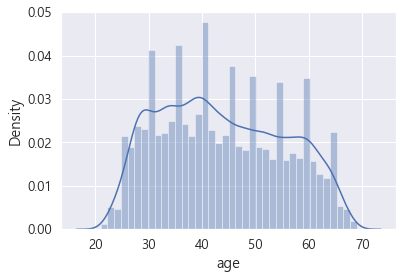

In [38]:
sns.distplot(train['age'])

<AxesSubplot:>

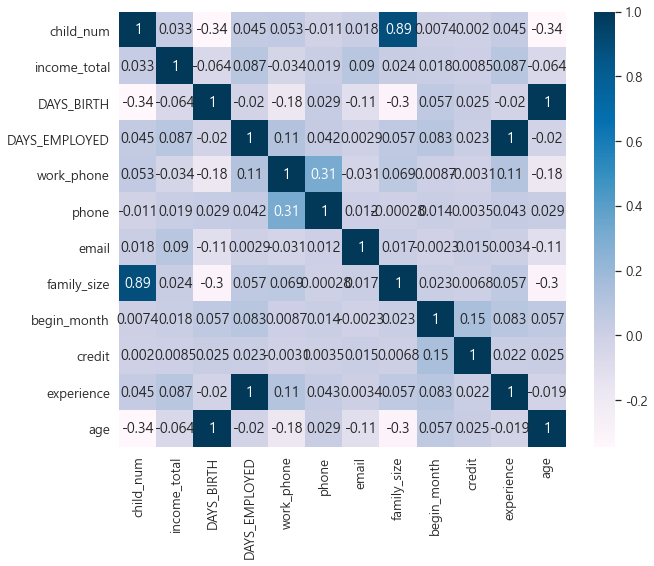

In [39]:
tr_corr=train.corr()
colormap = plt.cm.PuBu
plt.figure(figsize=(10,8))
sns.heatmap(tr_corr,annot=True,cmap=colormap,linecolor='white')

family size, child num 외 다중 공선성 적고 target 변수와도 상관관계 낮아보임
-> 외부데이터?

### 데이터 전처리

In [40]:
# 신용도 float에서 object로 변환
train = train.astype({'credit': 'object'})
train = train.astype({'work_phone': object})
train = train.astype({'phone': object})
train = train.astype({'email': object})

#### 결측치 처리

In [41]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
experience          0
age                 0
dtype: int64

In [42]:
test.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

-> 직업종류에 결측치 존재
1) 직업 없음
2) 직업 있는데 결측치


In [43]:
train.occyp_type.unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

직업 있는데 결측치인 사람
-> 직업 있으면 days_emoloyed 음수

In [44]:
train[ ((train['occyp_type'].notnull()) & (train['DAYS_EMPLOYED'] == 0)) ]
    # not mull이고 days employed 0인 것 없음

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,experience,age


In [45]:
 # 직업 결측치, 고용된 지 최소 하루 이상 -> 직업 있음
train[ ((train['occyp_type'].isnull()) & (train['DAYS_EMPLOYED'] > 0)) ]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,experience,age
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,4709,0,0,0,NaN,2.0,6.0,1.0,13.0,38.0
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,15131,1466,0,0,1,NaN,3.0,38.0,2.0,4.0,41.0
19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,13727,6031,0,0,0,NaN,2.0,7.0,2.0,17.0,38.0
20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,19850,1753,0,1,0,NaN,2.0,35.0,2.0,5.0,54.0
23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,14542,444,1,1,1,NaN,2.0,18.0,2.0,1.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,F,Y,N,0,121500.0,State servant,Higher education,Married,House / apartment,19912,4973,0,1,0,NaN,2.0,31.0,2.0,14.0,55.0
26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,19691,473,0,0,0,NaN,2.0,40.0,2.0,1.0,54.0
26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,13015,3647,0,0,0,NaN,2.0,13.0,2.0,10.0,36.0
26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,10498,2418,1,1,0,NaN,2.0,2.0,1.0,7.0,29.0


In [46]:
 # 결측치, days employed = 0 -> 직업 없음
train[ (train['occyp_type'].isnull()) & (train['DAYS_EMPLOYED'] == 0) ]


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,experience,age
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22922,0,0,1,0,NaN,1.0,41.0,2.0,0.0,63.0
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,23113,0,0,0,0,NaN,2.0,37.0,2.0,0.0,63.0
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,21253,0,0,1,0,NaN,2.0,7.0,2.0,0.0,58.0
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,22361,0,0,1,0,NaN,1.0,5.0,2.0,0.0,61.0
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21100,0,0,1,0,NaN,1.0,24.0,2.0,0.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,21151,0,0,0,1,NaN,1.0,60.0,1.0,0.0,58.0
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,22314,0,0,1,0,NaN,2.0,17.0,1.0,0.0,61.0
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,19238,0,0,0,0,NaN,2.0,57.0,2.0,0.0,53.0
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,24129,0,0,0,0,NaN,1.0,43.0,2.0,0.0,66.0


- 직업 없는 사람 => no job으로 결측치 채우기
- 직업 있는데 결측치인 사람 => ???

In [47]:
# 직업 없는 사람 => unemp
train.loc[(train['occyp_type'].isnull()) & (train['DAYS_EMPLOYED']==0) , 'occyp_type'] = 'unemp'

In [48]:
train.isnull().sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
work_phone          0
phone               0
email               0
occyp_type       3733
family_size         0
begin_month         0
credit              0
experience          0
age                 0
dtype: int64